# Instituto Superior de Engenharia de Lisboa
## Codificação de Sinais Multimédia
### Trabalho Prático 1

### Docente: 
- Gonçalo Marques

### Trabalho Realizado Por:
- Miguel Silvestre nº 45101
- Miguel Távora    nº 45170

# Introdução

O desenvolvimento do seguinte trabalho tem como intuito, não só pôr
em prática matéria dada nas aulas práticas da disciplina, mas também,
uma introdução ao utilizamento da biblioteca OpenCV, com o auxílio da
biblioteca Numpy.

Todos estes conceitos têm nos importância de modo a conseguirmos processar,
comprimir e, alterar imagens de acordo com o enunciado nos proposto.
A biblioteca OpenCV possuí diversos módulos, tais como: o processamento
de imagem e vídeo, a estrutura de dados, álgebra linear,
GUI(Interface Gráfica de Utilizador).

Esta mesma biblioteca encontra-se principalmente nas liguagens de programação
C e C++, no entanto iremos utilizá-la com Python e ajuda do
Numpy referenciado anteriormente. Assim, conseguimos processar e trabalhar
com vários formatos de ficheiros de imagem, tendo a vantagem de
ter funções do Numpy à nossa disposição, facilitando a commplexidade
do código e aumentando a enficiência do programa.

Como se vai poder ver ao longo do trabalho prático, utilizaremos a
imagem de Lena Söderberg, de modo a prosseguirmos com o processamento
e teste de algoritmos na imagem.

Esta, é uma imagem tipicamente utilizada na área de processamento de
imagem desde 1973.

<hr style="border:2px solid black"> </hr>

## Imports

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math

<hr style="border:2px solid black"> </hr>

## Funções cálculo de medidas desempenho

In [18]:
# calculator of SNR
def snr(img,img2):
    img = img*1.
    img2 = img2*1.
    diff=(img-img2)**2
    diff=np.sum(diff)
    soma=img**2
    soma=np.sum(soma)
    snr=10*np.log10(soma/diff)
    return snr


#calculator of PSNR
def pnsr(original, compressed):
    original = original*1.
    compressed = compressed*1.
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means there's no noise in the signal
        return 100 # Therefore PSNR have no importance
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

## Função de compressão

In [19]:
#calculator of the compression between the original file and the compressed file
def compression(directory_original,directory_compressed):

    original = os.stat(directory_original).st_size
    print("Original file size: ",original)
    compressed = os.stat(directory_compressed).st_size
    print("Compressed file size: ",compressed)

    return original/compressed

## Função do número de níveis de uma imagem

In [20]:
def levels(img):

	levels = []
	imgx = img.ravel()
	for x in imgx:
		if x not in levels:
			levels.append(x)

	return len(levels)

## Função de Dither

In [21]:
def dither(imgOriginal):
    img = np.copy(imgOriginal) # it will change the original image


    width,height = img.shape
    imgOut = np.zeros(img.shape,np.uint8)# creates the new image

    # loops over all the width and height
    for i in range(width - 1): 
        for j in range(height - 1): 
            oldImg = img[i,j] # gets the image on certain coordenate
            

            newImg = 255 if oldImg > 127 else 0 # creates a array if it's bigger than 127 or 0
            imgOut[i,j] = newImg # the position of the result is set by the previous value

            calcErro = oldImg - newImg # difference between old image and new

            # formulas for the dither  
            img[i,j+1] = img[i,j+1] + calcErro * (7/16)
            img[i+1,j+1] = img[i+1,j+1] + calcErro * (3/16)
            img[i+1,j] = img[i+1,j] + calcErro * (5/16)
            img[i+1,j-1] = img[i+1,j-1] + calcErro * (1/16)

    return imgOut

## Função guardar bytes da imagem num ficheiro

In [22]:
def save_image_bin(img):
    aux = np.zeros(8,dtype=np.uint8)
    count = 0
    binary = []
    
    for x in range(len(img)):
        for y in range(len(img[x])):
            aux[count] = int(img[x][y]/255) # if the values is 255 it goes to 1, else its 0
            if count == 7:
                binary.append(np.packbits(aux)) # pack of 8 bits to file
                count = 0

            count+=1

    binary = np.array(binary)
    binary.tofile('ex7.bin')

## Função para criar a espiral

In [23]:
def create_spiral(img, angle=1):
	#gets the center of the image
	center = len(img)/2
    
	for y in range(len(img)):
		for x in range(len(img[y])):

			#creates the vector between the two points in x and y
			vectorx = x - center
			vectory = y - center

			#return the angle in degrees of the arc tangent of the vectors
			alpha = np.degrees(math.atan2(vectorx, vectory))

			#checks if the angle is on a range where it should be black
			#sets to 0 (black) if true
			if(alpha%(angle*2)>=0 and alpha%(angle*2)<=angle):
				img[y][x] = 0
                
	return img

## Exercício 1 

In [24]:
img = cv2.imread("lenac.tif") #reads the image
 
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #image readed is in BGR and to show on matplotlib it has to be in RGB

Type of data: uint8
Array dimensions: (512, 512, 3)


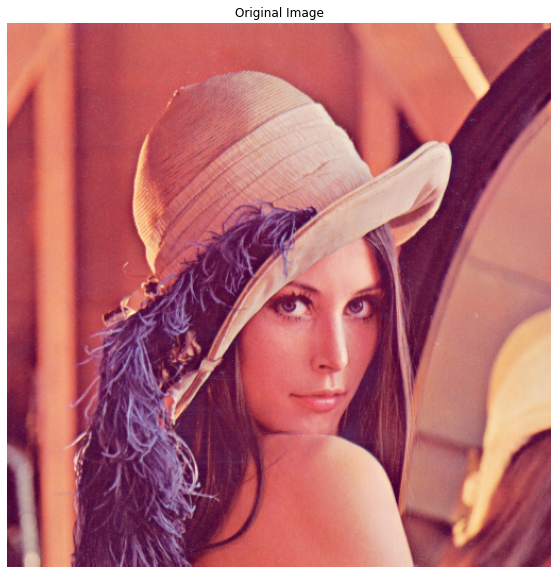

In [25]:
print("Type of data:", im_rgb.dtype) #show the type of data, image is always int 8 bytes
print("Array dimensions:", im_rgb.shape) #show the shape of image which is width, height, color plan(RGB)


plt.figure(figsize=(10, 10))
plt.imshow(im_rgb) #shows the image with matplotlib
plt.title('Original Image') # adds a title to the image
plt.axis('off')
plt.show() # show all content added

- O dtype de um numpy array define qual o tipo de tipos de dados númericos fundamentais. Exemplos de números são int8, int16, int32, float64

- O shape retorna a estrutura do numpy array, no caso das imagens é constituído por largura, altura e plano de cor 

<hr style="border:2px solid black"> </hr>

## Exercício 2

<Figure size 2160x2880 with 0 Axes>

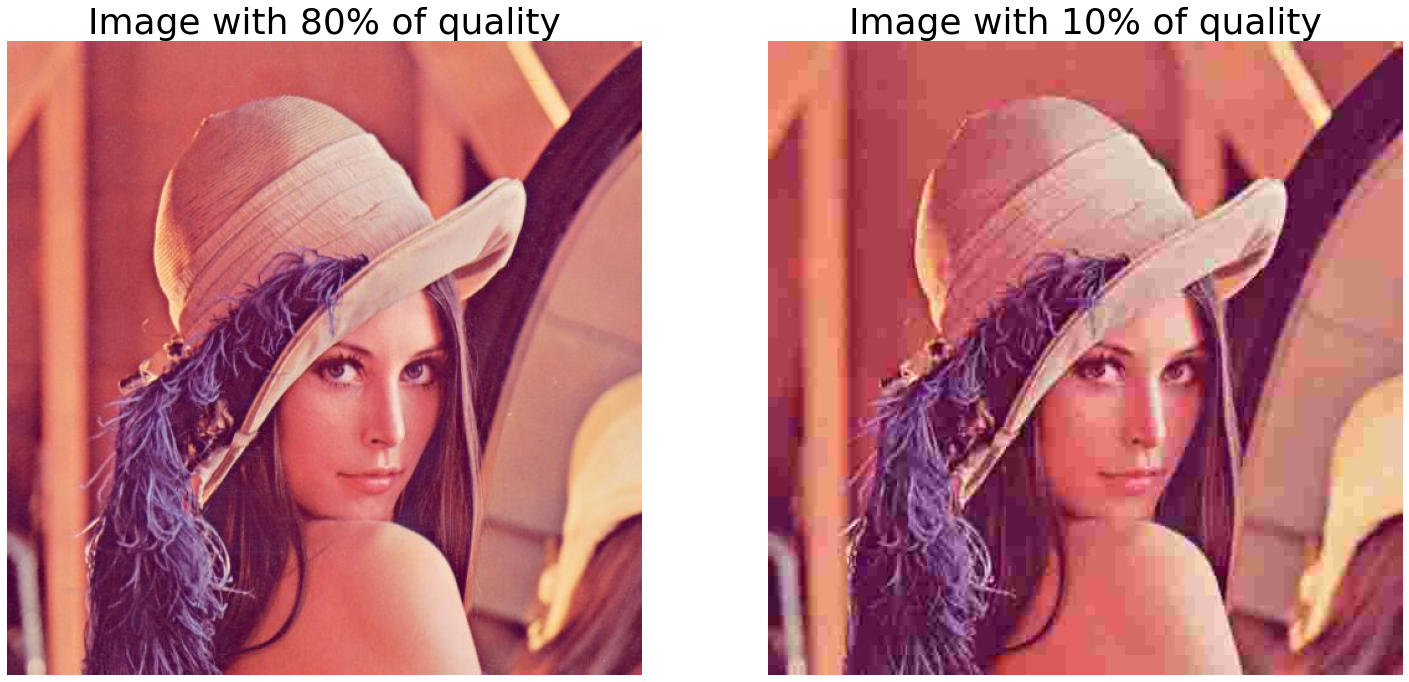

In [26]:
cv2.imwrite('file1.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 80)) # write the image file with 80% of the total quality of the image
cv2.imwrite('file2.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 10)) # write with 10% of total quality


img_80 = cv2.imread("file1.jpg")
im_rgb_80 = cv2.cvtColor(img_80, cv2.COLOR_BGR2RGB)

img_10 = cv2.imread("file2.jpg")
im_rgb_10 = cv2.cvtColor(img_10, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 40))

# creates a subplot to display two images horizontaly
f, axarr = plt.subplots(1,2,figsize=(25,25)) 

axarr[0].imshow(im_rgb_80)
axarr[0].axis('off')
axarr[0].set_title("Image with 80% of quality",fontsize=36)

axarr[1].imshow(im_rgb_10)
axarr[1].axis('off')
axarr[1].set_title("Image with 10% of quality",fontsize=36)

plt.show()

In [27]:
print("SNR image 80% quality: "+ str(snr(img,img_80)))
print("SNR image 10% quality: "+str(snr(img,img_10)))

print("PSNR image 80% quality: "+ str(pnsr(img,img_80)))
print("PSNR image 10% quality: "+str(pnsr(img,img_10)))

SNR image 80% quality: 28.468534958720454
SNR image 10% quality: 22.391956905436455
PSNR image 80% quality: 33.606097256534746
PSNR image 10% quality: 27.529519203250743


In [28]:
print("Compression for the image 80%: ",compression("lenac.tif","file1.jpg"))
print("Compression for the image 10%: ",compression("lenac.tif","file2.jpg"))

Original file size:  786572
Compressed file size:  44124
Compression for the image 80%:  17.82639833197353
Original file size:  786572
Compressed file size:  9566
Compression for the image 10%:  82.22579970729667


<hr style="border:2px solid black"> </hr>

## Exercício 3

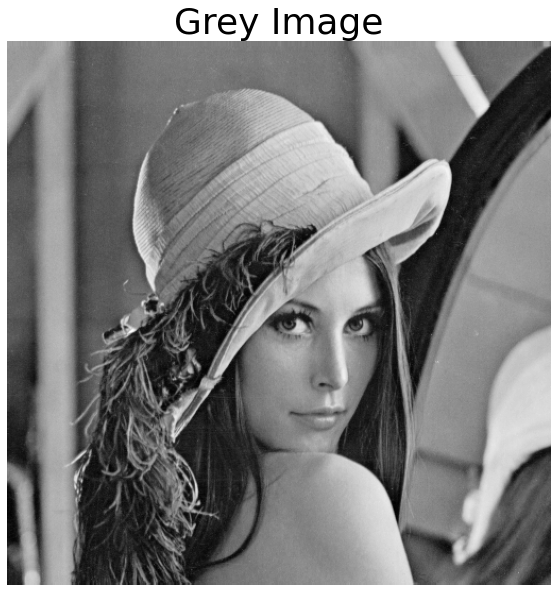

In [29]:
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # converts the image from 3 plans of colors to 1 gray


fig = plt.figure(figsize=(10, 10)) # creates a new figure
ax = fig.add_subplot(111) # add a subplot to the new figure, 111 means "1x1 grid, first subplot"

ax.imshow(gray_img, cmap='gray')
ax.axis('off')
ax.set_title("Grey Image",fontsize=36)

plt.show()

In [30]:
cv2.imwrite('gray.bmp', gray_img)

True

In [31]:
print("Compression: ",compression("lenac.tif","gray.bmp"))

Original file size:  786572
Compressed file size:  263222
Compression:  2.9882456633564063


- O ficheiro é 2.988 vezes mais pequeno do que o ficheiro original

<hr style="border:2px solid black"> </hr>

## Exercício 4

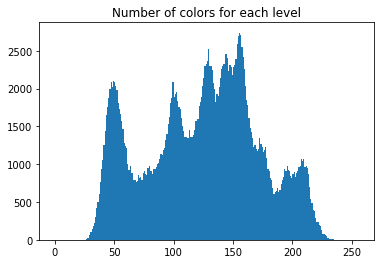

In [32]:
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title("Number of colors for each level")
plt.show()

In [33]:
print("Number of levels of image: ",levels(gray_img))

Number of levels of image:  215


<hr style="border:2px solid black"> </hr>

## Exercício 5

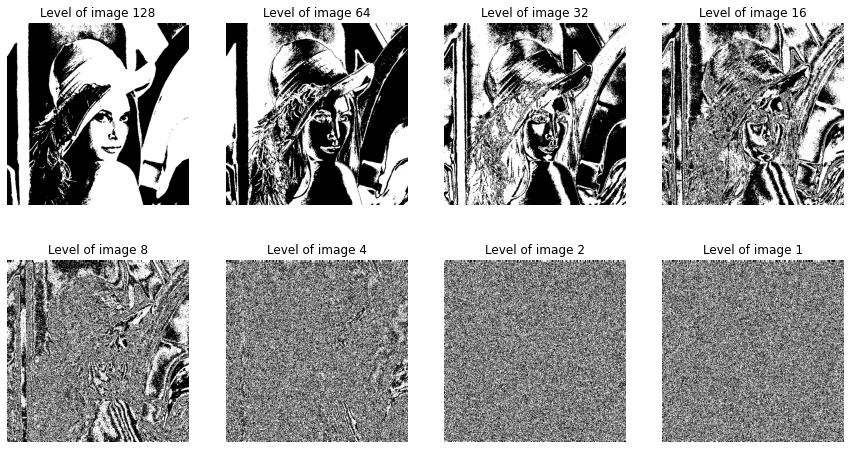

In [34]:
values = [128,64,32,16,8,4,2,1]

bool_array = []

result = []

# get a list with a boolean arrays when the bit is 1 or 0 (1 = True, 0 = False) 
for value in values:
	bool_array.append((gray_img/value).astype(int)%2 != 0)


# multiply the true false array on the image, when its false the value goes to 0
for x in range(len(bool_array)):
	result.append(255*bool_array[x])

# image representations
f, axarr = plt.subplots(2,4,figsize=(15,8))

# show all the content
count = 0
for x in range(0,2):
	for yx in range(0,4):
		axarr[x][yx].imshow(np.array(result[count]), cmap='gray')
		axarr[x][yx].axis('off')
		axarr[x][yx].set_title("Level of image "+str(values[count]))
		count+=1

plt.show()

<hr style="border:2px solid black"> </hr>

## Exercício 6

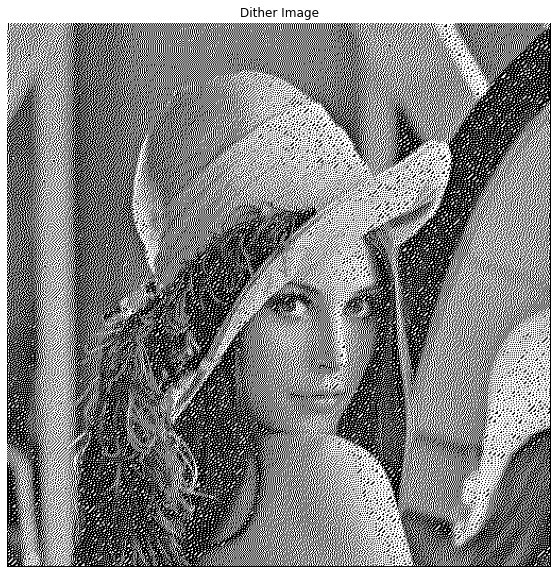

In [35]:
dith = dither(gray_img)

plt.figure(figsize=(10, 10))
plt.imshow(dith, cmap='gray')
plt.title('Dither Image')
plt.axis('off')
plt.show()

<hr style="border:2px solid black"> </hr>

## Exercício 7

In [36]:
cv2.imwrite('dith.bmp', dith) # writes the image to filesystem
save_image_bin(dith)

print("Compression for binary file: ",compression("dith.bmp","ex7.bin"))

Original file size:  263222
Compressed file size:  37449
Compression for binary file:  7.028812518358301


<hr style="border:2px solid black"> </hr>

## Exercício 8

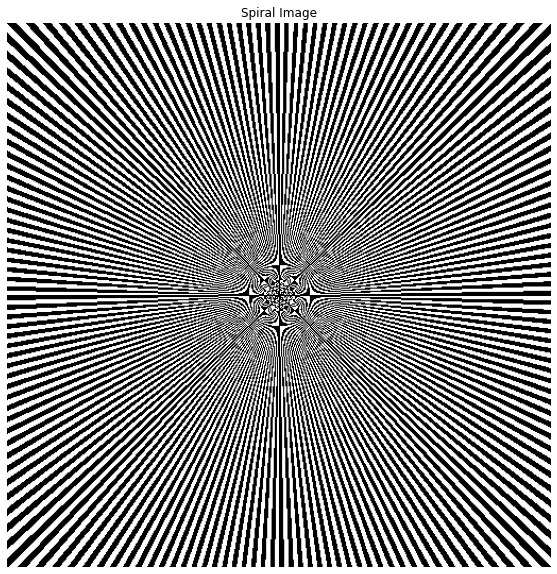

In [37]:
img.fill(255) # converts the all image to white
spiral = create_spiral(img)

plt.figure(figsize=(10, 10))
plt.imshow(spiral, cmap='gray')
plt.title('Spiral Image')
plt.axis('off')
plt.show()

Como o angulo utilizado foi 1º a imagem em zonas muito pequenas sofre aliasing.
Quanto mais nas bordas da imagem se encontra, mais detalhado fica a imagem.